In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### Load data

#### Description

This section takes a brief look at the dataset and its primarily numeric features.

In [2]:
# df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
df = pd.read_csv('data/train.csv')

df.drop(columns=['Id'], inplace=True)

display(df.head())
display(df.shape)
display(df.info())

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


(617, 57)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

None

### Preprocessing

#### Description

In this section, we seperate the target from the rest of the dataset, and separate the one categorical feature out from the rest of them. For the numerical data, we apply a standard scaler, and for the categorical feature we apply a one hot encoder.
For all features we apply a simple imputer because there are some missing values.

Then, we take a look at how the data will look after the preprocessor handles it.

In [3]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

target = df['Class']
data = df.drop(columns=['Class'])

categorical_features = ['EJ']
numeric_features = [col for col in data.columns if col != 'EJ']

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), numeric_features),
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder()), categorical_features)
)

transformed_data = preprocessor.fit_transform(data)

In [4]:
pd.DataFrame(transformed_data).head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-1.900558,-0.083417,-0.173502,-0.038354,-0.405383,...,-0.035806,-0.250869,-0.940094,-0.410260,-0.655511,-0.948991,0.531241,-0.815752,0.0,1.0
1,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.750457,-0.083417,0.678919,-0.104787,0.048541,...,-0.060566,0.113218,-1.145070,-0.410260,0.687893,-0.238862,-0.509218,1.304239,1.0,0.0
2,-0.015212,-0.377169,-0.261669,-0.094845,-0.189295,0.465662,-0.083417,0.519453,-0.104787,-0.071089,...,-0.051023,0.596934,1.637944,-0.299210,-0.051850,-0.351743,-0.424754,-0.808323,0.0,1.0
3,-0.480851,0.138196,0.012347,0.547477,-0.189295,-0.729610,-0.083417,0.112088,-0.104787,-0.391109,...,-0.060566,-0.105234,-0.219883,-0.342195,-0.650833,0.858232,1.101332,-0.812311,0.0,1.0
4,-0.206946,0.100517,-0.261669,-0.356885,-0.189295,-0.628845,-0.013229,-1.649292,1.445139,0.125327,...,0.896815,-0.230064,-0.432313,0.099920,-0.318309,1.409422,-0.395228,-0.818054,0.0,1.0


### Create the models

#### Description
In this section, we create the pipelines for the models and directly put in the hyperparameters. We've done grid search for each of these models individually and discovered optimal hyperparameters beforehand.

In [5]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import (
    cross_validate
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipelines = {
    "logistic_regression": make_pipeline(preprocessor, LogisticRegression()),
    "logistic_regression_pca": make_pipeline(preprocessor, PCA(n_components=37), LogisticRegression()),
    "SVC": make_pipeline(preprocessor, SVC(kernel='rbf', C=1.0, gamma='scale')),
    "random_forest": make_pipeline(preprocessor, RandomForestClassifier(n_estimators=50,)),
    "hist_gradient_boosting": make_pipeline(preprocessor, HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, max_leaf_nodes=31)),
    "gaussian_process": make_pipeline(preprocessor, GaussianProcessClassifier()),
    "guassian_process_pca": make_pipeline(preprocessor, PCA(n_components=37), GaussianProcessClassifier()),
    "k_neighbors": make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=5)),
    "k_neighbors_pca": make_pipeline(preprocessor, PCA(n_components=7), KNeighborsClassifier(n_neighbors=5)),
    "k_neighbors_lda": make_pipeline(preprocessor, LinearDiscriminantAnalysis(), KNeighborsClassifier(n_neighbors=5))
}

### Cross Validation
 
#### Description
We use sklearn's cross validation function to easily discern performance metrics for each of the pipelines we just created. This allows us to get a good idea of which model we should submit to do the final predictions.

In [6]:
cv_scores = {}
for name, pipe in pipelines.items():
    scores = cross_validate(pipe, data, target, scoring=['accuracy', 'precision', 'recall', 'f1'])
    cv_scores[name] = {}
    cv_scores[name]['accuracy'] = scores["test_accuracy"].mean()
    cv_scores[name]['precision'] = scores["test_precision"].mean()
    cv_scores[name]['recall'] = scores["test_recall"].mean()
    cv_scores[name]['f1'] = scores["test_f1"].mean()

display(pd.DataFrame(cv_scores))

c:\Users\sjhar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\sjhar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\sjhar\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjhar\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

,logistic_regression,logistic_regression_pca,SVC,random_forest,hist_gradient_boosting,gaussian_process,guassian_process_pca,k_neighbors,k_neighbors_pca,k_neighbors_lda
accuracy,0.881681,0.880055,0.880055,0.912484,0.938395,0.871938,0.870351,0.880081,0.899515,0.886494
precision,0.702722,0.707460,0.831049,0.870820,0.869768,0.727943,0.732017,0.823810,0.865884,0.707760
recall,0.555411,0.537229,0.388312,0.601299,0.758009,0.425108,0.425974,0.396970,0.498701,0.592208
f1,0.618295,0.608094,0.525513,0.700086,0.808992,0.534439,0.533038,0.532545,0.627072,0.643234


### Visualization

#### Description

We put the aforementioned cross-validation results onto a bar graph so interpreting the data is even faster and easier.

(0.8, 1.0)

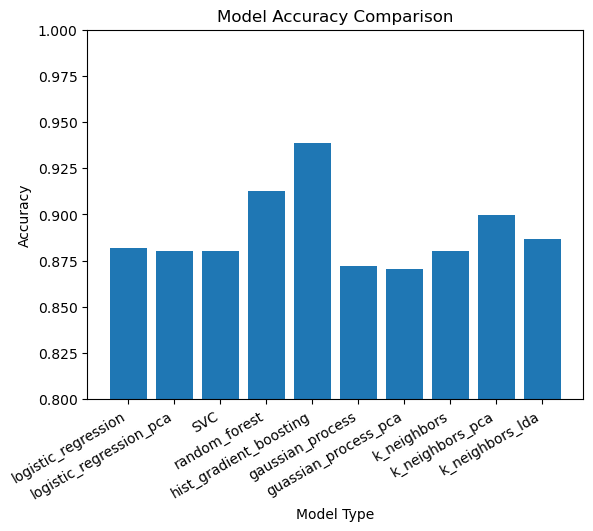

In [7]:
import matplotlib.pyplot as plt

plt.bar(cv_scores.keys(), [cv_scores[model]['accuracy'] for model in cv_scores.keys()])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model Type')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)

(0.4, 1.0)

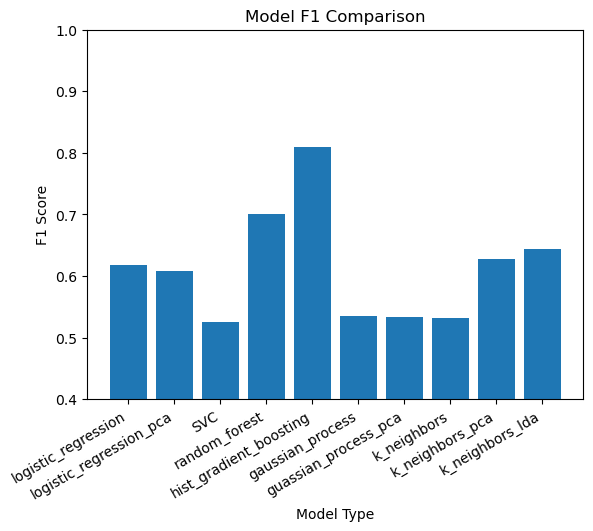

In [8]:
plt.bar(cv_scores.keys(), [cv_scores[model]['f1'] for model in cv_scores.keys()])
plt.title('Model F1 Comparison')
plt.xlabel('Model Type')
plt.xticks(rotation=30, ha='right')
plt.ylabel('F1 Score')
plt.ylim(0.4, 1)

### Export the predictions for the best performing model

#### Description
Because the gradient boosting model achieved the highest scores in cross validation, this is the model we will use for the final submission.

In [10]:
test_df = pd.read_csv('data/test.csv')
#test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

# Prepare test features
test_x = test_df.drop(columns=['Id'])

pipelines["hist_gradient_boosting"].fit(data, target)
prediction = pipelines["hist_gradient_boosting"].predict_proba(test_x)
submission = pd.DataFrame(prediction)
submission['Id'] = test_df['Id'].values
submission.rename(columns={0: "class_0", 1: "class_1"}, inplace=True)

submission.to_csv('submission.csv', index=False)